In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import time 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

Reference: https://github.com/ageron/handson-ml/issues/301

In [3]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
mnist.target

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [6]:
train_img_arr, test_img_arr, train_label, test_label = train_test_split(
    mnist.data, mnist.target, test_size=0.3, random_state=0)

In [7]:
print('training input size', train_img_arr.shape)

training input size (49000, 784)


In [8]:
print('test input size', test_img_arr.shape)

test input size (21000, 784)


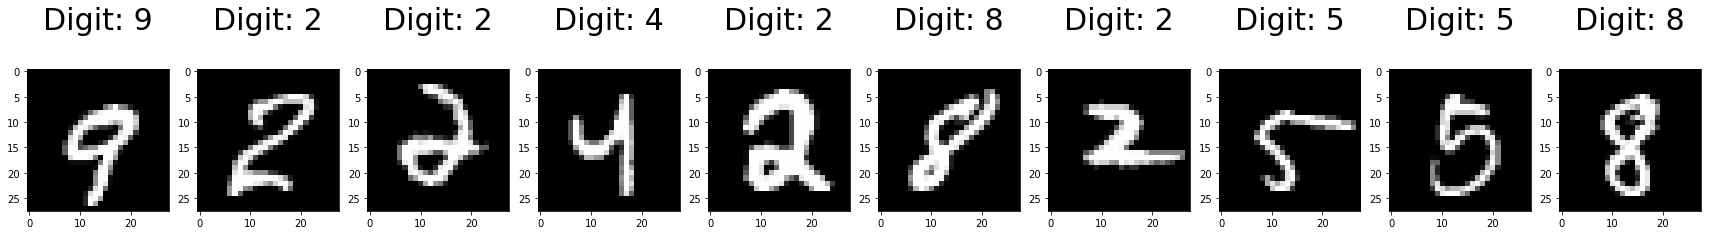

In [9]:
plt.figure(figsize=(30,5))
for index, (image, label) in enumerate(zip(train_img_arr[0:10], train_label[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap='gray')
    plt.title('Digit: %i\n' % label, fontsize = 30)

# Model Development

In [10]:
start = int(round(time.time() * 1000))

In [11]:
clf = MLPClassifier(solver='sgd', activation='tanh',alpha=1e-5,hidden_layer_sizes=(100), random_state=1)
clf.fit(train_img_arr,train_label)
end = int(round(time.time() * 1000))
print("--NN fitting finished in ", (end-start), "ms--------------")
predicted=clf.predict(test_img_arr)
expected=test_label

--NN fitting finished in  121061 ms--------------


In [12]:
print("Accuracy is:",round(metrics.accuracy_score(expected,predicted)*100,2))

Accuracy is: 96.26


In [14]:
print("Classification report for kNN classifier %s:\n%s\n"
     % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for kNN classifier MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2008
           1       0.98      0.99      0.98      2412
           2       0.96      0.95      0.96      2045
           3       0.95      0.96      0.95      2082
           4       0.96      0.97      0.96      2078
           5       0.97      0.94      0.95      1920
           6       0.97      0.97      0.97      2078
           7       0.96      0.97      0.97      2191
           8       0.95 

In [15]:
print("Test error is:",100-round(metrics.accuracy_score(expected,predicted)*100,2))

Test error is: 3.739999999999995


In [16]:
misclassified_sample = []
index = 0
for actual, predict in zip(expected, predicted):
    if actual != predict:
        misclassified_sample.append(index)
    index += 1

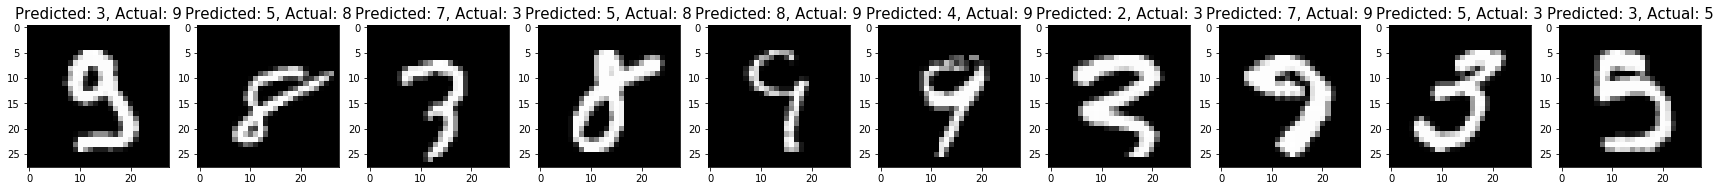

In [17]:
plt.figure(figsize=(30,5))
for index, fail_index in enumerate(misclassified_sample[0:10]):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(test_img_arr[fail_index], (28,28)), cmap='gray')
    plt.title('Predicted: {}, Actual: {}'.format(predicted[fail_index], expected[fail_index]), fontsize = 15)